In [1]:
import sys
import random
import os
import numpy as np
import iisignature as iis
import matplotlib.pyplot as plt
import gudhi
from gudhi import plot_persistence_diagram
from gudhi import plot_persistence_density
from gtda.homology import VietorisRipsPersistence
from gtda.homology import FlagserPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
from gudhi.representations.vector_methods import Entropy
from gtda.diagrams import PairwiseDistance
from gtda.plotting import plot_diagram
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%run FUNCTIONS.ipynb

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [40]:
# Path signature classification

Sig=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    s=iis.prepare(100,2)
    sig=iis.logsig(time_series,s)
    Sig.append(sig)
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    s=iis.prepare(100,2)
    sig=iis.logsig(time_series,s)
    Sig.append(sig)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    
    s=iis.prepare(100,2)
    sig=iis.logsig(time_series,s)
    Sig.append(sig)
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    s=iis.prepare(100,2)
    sig=iis.logsig(time_series,s)
    Sig.append(sig)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    s=iis.prepare(100,2)
    sig=iis.logsig(time_series,s)
    Sig.append(sig)
    labels.append("DT")
    
Sig_array=np.array(Sig)

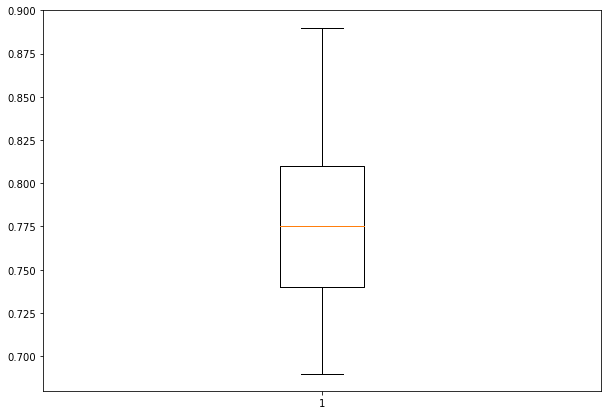

In [41]:
#PLOT OF RANDOM FOREST ACCURACY PATH SIGNATURE
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(Sig_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [42]:
# Lead matrix


Lead_list=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat) 
    
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat) 
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat)
    labels.append("DT")
    
Lead_array=np.array(Lead_list)

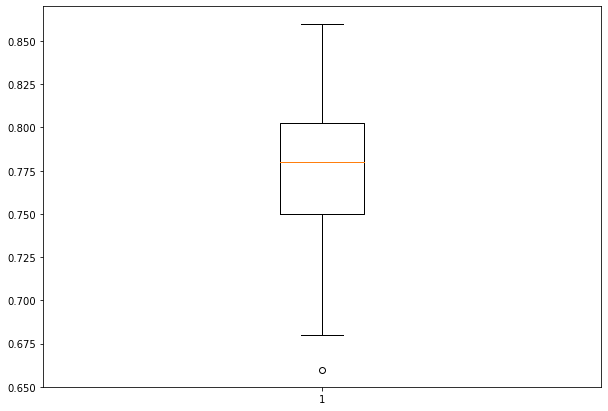

In [43]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(Lead_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [80]:
# Clique Directed


top_dir=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir.append(feat)
    
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir.append(feat)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir.append(feat) 
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir.append(feat)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir.append(feat)
    labels.append("DT")
    
top_dir_arr=np.array(top_dir)

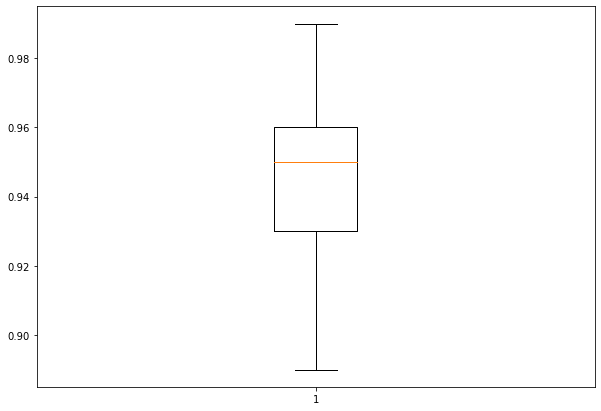

In [81]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(top_dir_arr,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [27]:
# Hyper coherence high order

indifference_value=0.1
hyp_list=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    hyp=hyper_coherence(time_series,indifference_value)
    hyp_list.append(hyp)
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    hyp=hyper_coherence(time_series,indifference_value)
    hyp_list.append(hyp)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    hyp=hyper_coherence(time_series,indifference_value)
    hyp_list.append(hyp)
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    hyp=hyper_coherence(time_series,indifference_value)
    hyp_list.append(hyp)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    hyp=hyper_coherence(time_series,indifference_value)
    hyp_list.append(hyp)
    labels.append("DT")
    
HYP=(np.array(hyp_list)).reshape(-1,1)

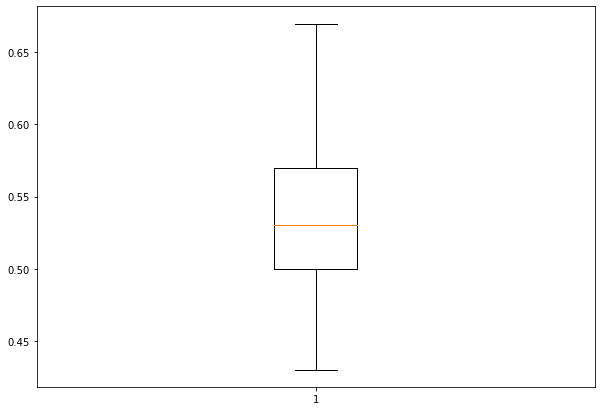

In [28]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(HYP,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [21]:
# Clique Undirected
# ( Clique undirected is very similar to clique directed, but it is faster)

top_dir_un=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un.append(feat)
    
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un.append(feat)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un.append(feat) 
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un.append(feat)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
        
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un.append(feat)
    labels.append("DT")
    
top_dir_un_arr=np.array(top_dir_un)

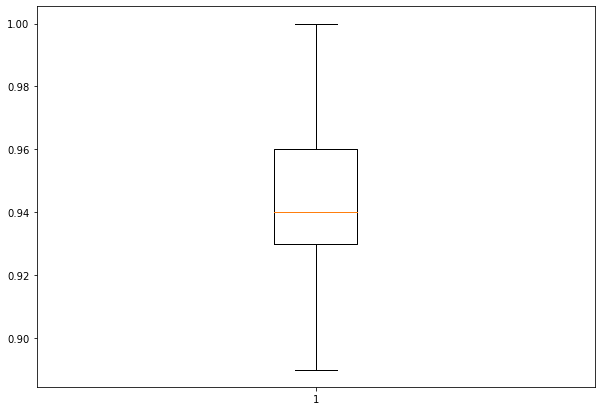

In [22]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(top_dir_un_arr,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [36]:
# Only entropy high order

indifferent_value=0.05
EN_list=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[S_0,S_1]
    EN_list.append(feat)
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[S_0,S_1]
    EN_list.append(feat)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[S_0,S_1]
    EN_list.append(feat) 
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[S_0,S_1]
    EN_list.append(feat)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[S_0,S_1]
    EN_list.append(feat)
    labels.append("DT")
    
EN=np.array(EN_list)

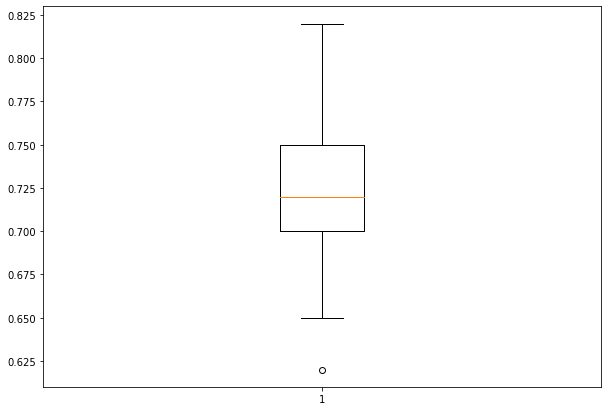

In [37]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(EN,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [34]:
# High order entropy + hyper coherence

indifferent_value=0.05
High_list=list()
labels=[]




for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"PS_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat)
    labels.append("PS")

    
    

for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"CBMD_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat)
    labels.append("CBMD")


    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"STI_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat) 
    labels.append("STI")

    

for i in range(100):
    data2=np.load(f"FDC_{i}.npy",allow_pickle=True)
    time_series=np.zeros((201,100))
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat)
    labels.append("FDC")

    
    
    
for i in range(100):
    time_series=np.zeros((201,100))
    data2=np.load(f"DT_{i}.npy",allow_pickle=True)
    data=data2.tolist()
    for j in range(100):
        time_series[:,j]=data[j][10000::50]
    dgm,hyp=create_diagram_directly_3(time_series,indifferent_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat)
    labels.append("DT")
    
HIGH=np.array(High_list)

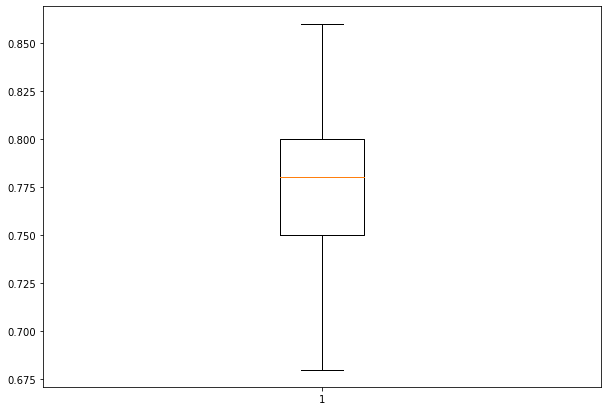

In [35]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(HIGH,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()